# Project – Prediction and Quantization

### by Alex Tejada

## Part 1 - IIR filter for "one-step-ahead" prediction

In [2]:
from prediction import PredictionModel

In [3]:
x_n = [1.0, -1.0, 0.0, 2.0, 1.0, -1.0, -2.0, 0.0, 1.0, 0.0,] # Input x[n]
coefficients = [0.8570, -0.2500, 1.0000] # {a}
coefficients_optimized = [0.7716, -0.2835, 1.0000] # {a*}

# Setting up the prediction model
model = PredictionModel(x_n, coefficients, coefficients_optimized)

# calculating x^ and the error
model.getPrediction()

#### Plotting the Squence with the Prediction 

x[n] Values:   [ 1. -1.  0.  2.  1. -1. -2.  0.  1.  0.]
X^ Values:     [ 0.143  0.107 -1.25   1.286  0.643 -1.893 -1.536  0.5    2.143  0.25 ]
Error Values:  [ 0.857 -1.107  1.25   0.714  0.357  0.893 -0.464 -0.5   -1.143 -0.25 ]
Prediction Gain:  -0.9540843124456767


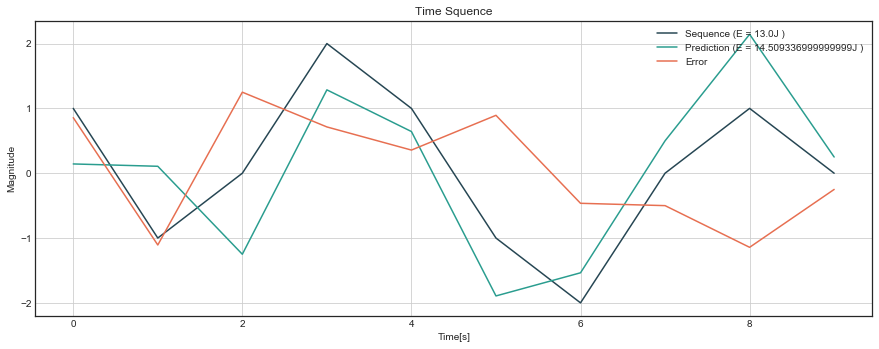

In [4]:
model.printPrediction()

##### Plotting the Coefficients with Zeros and Poles

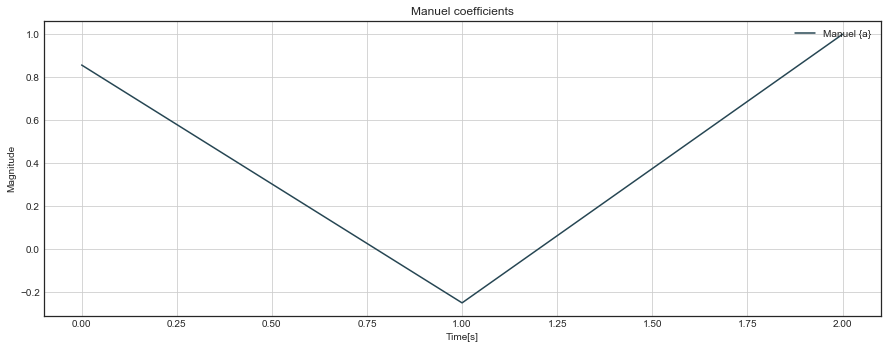

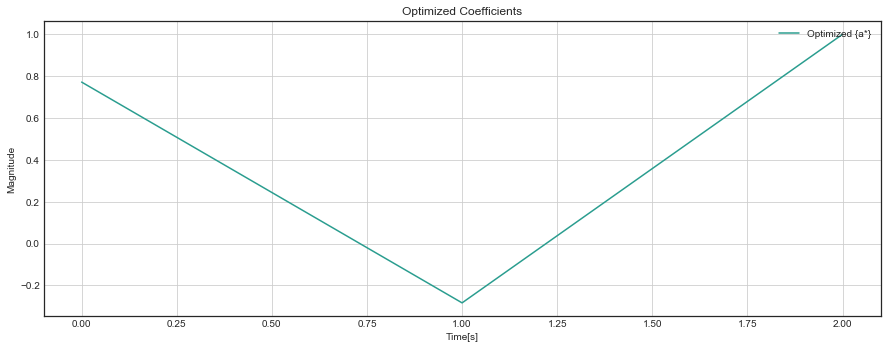

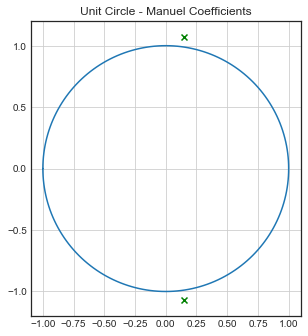

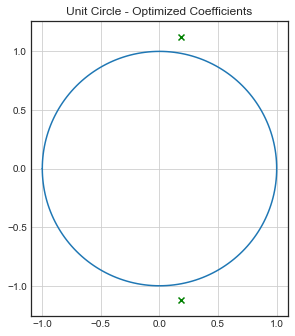

In [5]:
model.printCoefficients()

### Change Squence to wave file

In [4]:
import librosa
# Getting new x[n]
wav_x_n, sr = librosa.load("snip.wav", sr=None,duration=0.020)
                               
# Setting up the prediction model
model = PredictionModel(wav_x_n, coefficients_optimized, coefficients_optimized)

# calculating x^ and the error
model.getPrediction()                              

x[n] Values:   [ 0.05215454  0.04827881  0.01062012 -0.00839233 -0.01397705 -0.00674438
 -0.00439453  0.00915527  0.00061035 -0.01882935 -0.02053833 -0.02532959
 -0.03308105 -0.03240967 -0.02658081 -0.02316284 -0.02044678 -0.01147461
 -0.00814819 -0.00457764  0.00146484  0.00698853  0.00881958  0.00769043
  0.00695801  0.00372314  0.00366211  0.0022583   0.         -0.00259399
 -0.00338745 -0.00372314 -0.00509644 -0.00531006 -0.00686646 -0.00601196
 -0.0045166  -0.00247192  0.00039673  0.00039673  0.00302124  0.00296021
  0.00494385  0.00622559  0.00482178  0.00363159  0.00216675  0.00234985
  0.00424194  0.00637817  0.00506592  0.00482178  0.00427246  0.00360107
  0.00195312  0.00210571  0.00286865  0.00497437  0.0071106   0.0088501
  0.00720215  0.00576782  0.00369263  0.0032959   0.00332642  0.00241089
  0.00146484 -0.00024414 -0.00341797 -0.00558472 -0.00714111 -0.00805664
 -0.01000977 -0.01119995 -0.01190186 -0.01416016 -0.01419067 -0.01315308
 -0.01391602 -0.01544189 -0.01330566 

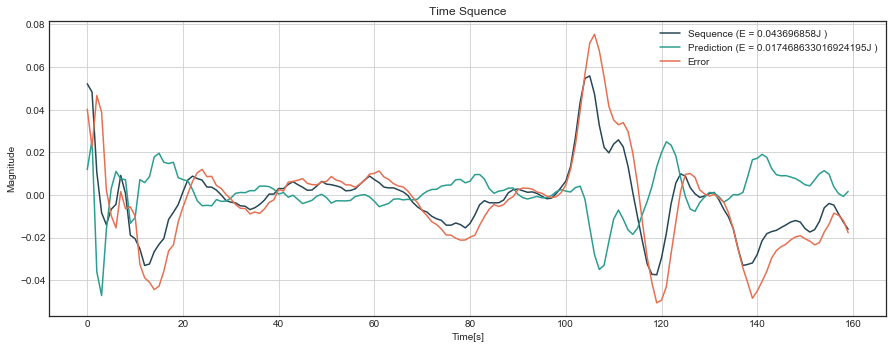

In [12]:
model.printPrediction()

In [15]:
# Getting new coefficients for a second-order filter
wav_coefficients = librosa.lpc(wav_x_n, 2)
print(wav_coefficients)

[ 1.         -1.5633409   0.67695105]


x[n] Values:   [ 0.05215454  0.04827881  0.01062012 -0.00839233 -0.01397705 -0.00674438
 -0.00439453  0.00915527  0.00061035 -0.01882935 -0.02053833 -0.02532959
 -0.03308105 -0.03240967 -0.02658081 -0.02316284 -0.02044678 -0.01147461
 -0.00814819 -0.00457764  0.00146484  0.00698853  0.00881958  0.00769043
  0.00695801  0.00372314  0.00366211  0.0022583   0.         -0.00259399
 -0.00338745 -0.00372314 -0.00509644 -0.00531006 -0.00686646 -0.00601196
 -0.0045166  -0.00247192  0.00039673  0.00039673  0.00302124  0.00296021
  0.00494385  0.00622559  0.00482178  0.00363159  0.00216675  0.00234985
  0.00424194  0.00637817  0.00506592  0.00482178  0.00427246  0.00360107
  0.00195312  0.00210571  0.00286865  0.00497437  0.0071106   0.0088501
  0.00720215  0.00576782  0.00369263  0.0032959   0.00332642  0.00241089
  0.00146484 -0.00024414 -0.00341797 -0.00558472 -0.00714111 -0.00805664
 -0.01000977 -0.01119995 -0.01190186 -0.01416016 -0.01419067 -0.01315308
 -0.01391602 -0.01544189 -0.01330566 

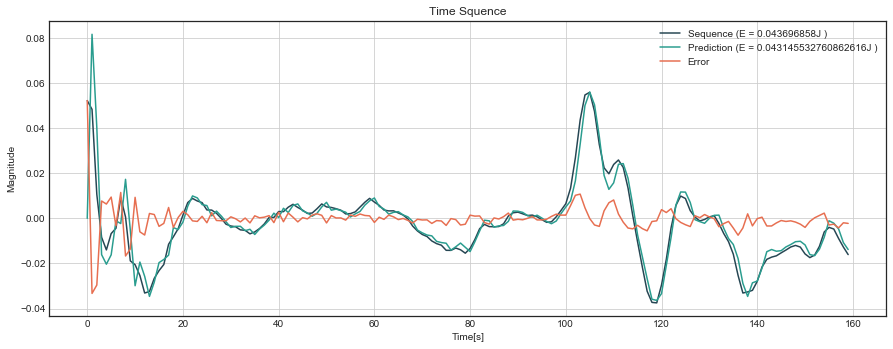

In [16]:
# Creating a new model with the new optimized coefficients
model = PredictionModel(wav_x_n, wav_coefficients, coefficients_optimized)

# calculating x^ and the error
model.getPrediction()  

# Getting the performance of the model with the new coefficients
model.printPrediction()

#### Questions of Interest 

i.) What is the difference between the optimal and non-optimal predictor coefficients in terms of the energy of the predicted (x_hat[n]) and error (e[n]) sequences?

    The predicted waveform generated a lower energy than that of the original signal. This could be due to the predicted value lack in ability to reconstruct the origianl input.

ii.) How does the optimal predictor improve the outcomes (think in terms of dB relative to the original sequence, or prediction gain)

    The optimized version yielded a lessor prediction gain. This also correlates to the lower error that was also given from the singal; since the prediction is more accurate, less distortion is occuring form predictions. Vice versa when considering the non-optimial coefficients; these gave more error to the signal and skewed the prediction, resulting in higher prediction gain.

iii.) Why does the prediction gain improve when using the optimal predictor vs. the non-optimal predictor?

    Since the optimal predictor are using coefficients that are more align with the singal, the gain improves tremendously. The non-optimal version, however, is not reinforced to hande the wave

iv.) What should happen to the prediction gain if you increase the order of the prediction filter? Can you increase the order of the filter “too much” … ? Explain what happens, and why

    Higher-ordered filters should improve the prediction to allow better presiction gain. However, overfitting can occur and provide a lessor efficiency for the filter.

## Part 2 - Using a quantizer to discretize sample values

#### Quantizing coefficients

In [7]:
quantize_coefficients = model.coeQuantizer2bin(coefficients_optimized)
print(quantize_coefficients )

[0.5812868685638481, -1, 1.0]


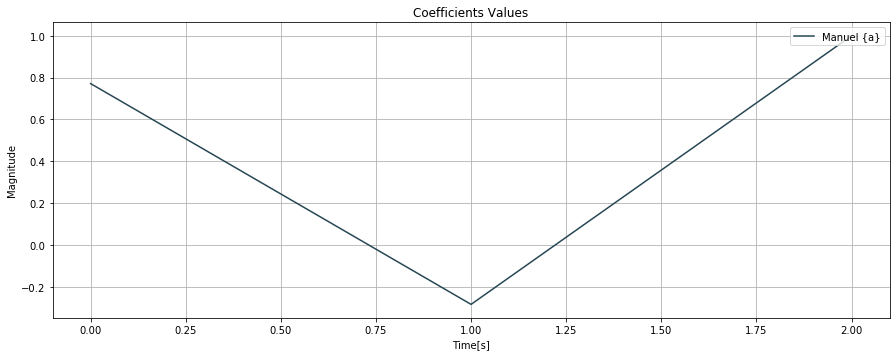

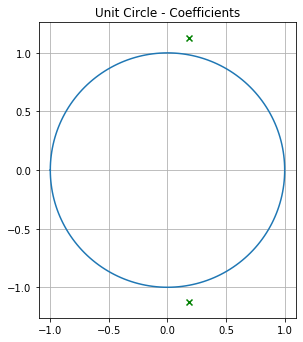

In [8]:
model.plotCoefficients(coefficients_optimized)

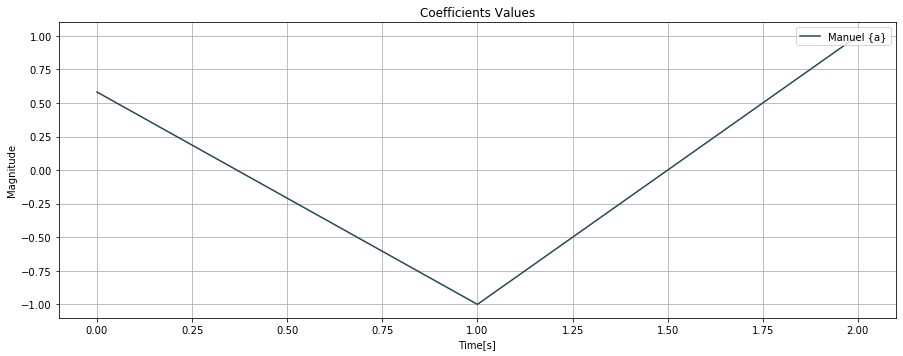

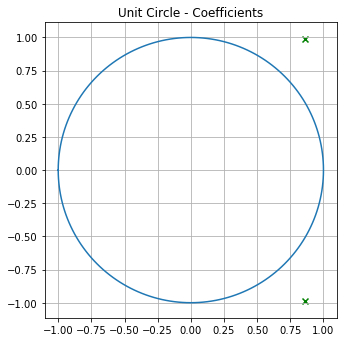

In [9]:
model.plotCoefficients(quantize_coefficients)

#### Applying the quantized coefficients

x[n] Values:   [ 1. -1.  0.  2.  1. -1. -2.  0.  1.  0.]
X^ Values:     [ 0.41871313  0.58128687 -2.          1.83742626  2.41871313 -1.41871313
 -2.83742626 -1.          2.41871313  1.        ]
Error Values:  [ 0.58128687 -1.58128687  2.          0.16257374 -1.41871313  0.41871313
  0.83742626  1.         -1.41871313 -1.        ]
Prediction Gain:  -3.864774465169595


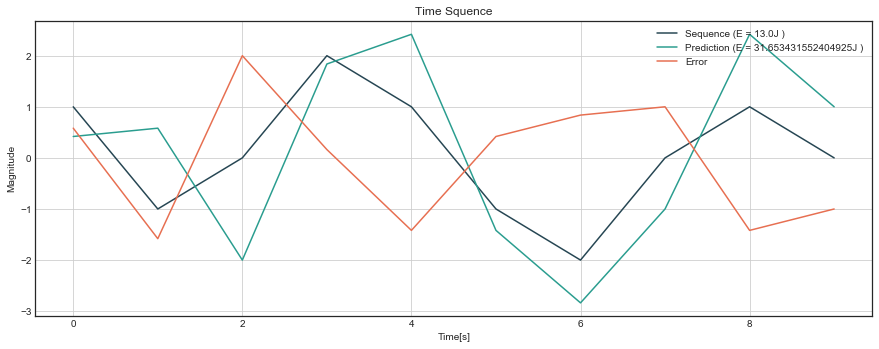

In [10]:
# Creating a new model with the new optimized coefficients
model = PredictionModel(x_n, quantize_coefficients, coefficients_optimized)

# calculating x^ and the error
model.getPrediction()  

# Getting the performance of the model with the new coefficients
model.printPrediction()

In [11]:
wav_x_n, sr = librosa.load("snip.wav", sr=None,duration=0.020)
                               
# Setting up the prediction model
model = PredictionModel(wav_x_n, quantize_coefficients, coefficients_optimized)

# calculating x^ and the error
model.getPrediction()  

x[n] Values:   [ 0.05215454  0.04827881  0.01062012 -0.00839233 -0.01397705 -0.00674438
 -0.00439453  0.00915527  0.00061035 -0.01882935 -0.02053833 -0.02532959
 -0.03308105 -0.03240967 -0.02658081 -0.02316284 -0.02044678 -0.01147461
 -0.00814819 -0.00457764  0.00146484  0.00698853  0.00881958  0.00769043
  0.00695801  0.00372314  0.00366211  0.0022583   0.         -0.00259399
 -0.00338745 -0.00372314 -0.00509644 -0.00531006 -0.00686646 -0.00601196
 -0.0045166  -0.00247192  0.00039673  0.00039673  0.00302124  0.00296021
  0.00494385  0.00622559  0.00482178  0.00363159  0.00216675  0.00234985
  0.00424194  0.00637817  0.00506592  0.00482178  0.00427246  0.00360107
  0.00195312  0.00210571  0.00286865  0.00497437  0.0071106   0.0088501
  0.00720215  0.00576782  0.00369263  0.0032959   0.00332642  0.00241089
  0.00146484 -0.00024414 -0.00341797 -0.00558472 -0.00714111 -0.00805664
 -0.01000977 -0.01119995 -0.01190186 -0.01416016 -0.01419067 -0.01315308
 -0.01391602 -0.01544189 -0.01330566 

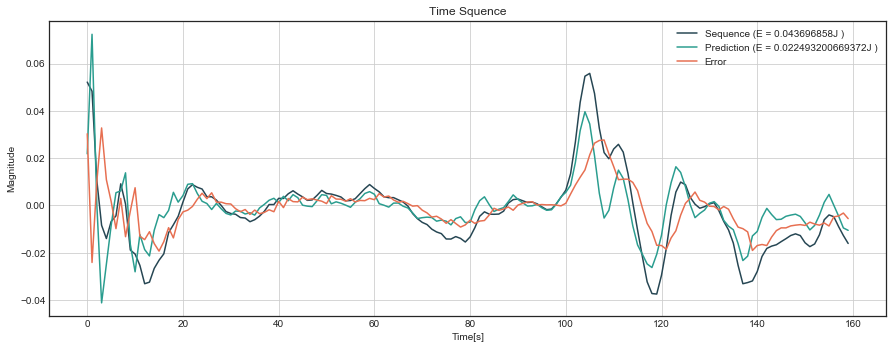

In [12]:
model.printPrediction()

## Part 3 - Integration

